<h2> Transfer Learning - VGG16 + ANN (1 hidden 128 nodes)</h2>
<hr>
CORN DATASET
<hr>
About the Dataset:
<br>
<br>Common Rust - 1306 images
<br>Gray Leaf Spot - 574 images
<br>Blight -1146 images
<br>Healthy - 1162 images
<hr>
<br>
Accuracy: 95.93%
<br>VGG16 - 13 convolutional layers, 5 Max Pooling layers, and 3 Dense layers (Total: 21) 16 weight layers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle
X = pickle.load(open('/content/drive/MyDrive/Dataset/Corn/X_aug.pickle', 'rb'))
y = pickle.load(open('/content/drive/MyDrive/Dataset/Corn/y_aug.pickle', 'rb'))

In [ ]:
X.shape

(13138, 80, 80, 3)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten, Dropout
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.models import Sequential
import numpy as np

<h3>VGG16</h3>

In [ ]:
vgg = VGG16(input_shape=(80,80,3), weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# y = y.reshape(13138, 1)

In [ ]:
# y.shape

(13138, 1)

In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
x = Flatten()(vgg.output)

<h3>ANN</h3>

In [ ]:
x = Dense(128, activation='relu', name='fcl')(x)

In [ ]:
x = Dropout(0.3)(x)

In [ ]:
prediction = Dense(4, activation='softmax', name='prediction')(x)

In [ ]:
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()

In [ ]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
model.fit(X_train, y_train, batch_size=32, epochs=10)


Epoch 1/10
329/329 [==============================] - 18s 25ms/step - loss: 1.3044 - accuracy: 0.8163
Epoch 2/10
329/329 [==============================] - 8s 24ms/step - loss: 0.2291 - accuracy: 0.9143
Epoch 3/10
329/329 [==============================] - 7s 23ms/step - loss: 0.1660 - accuracy: 0.9370
Epoch 4/10
329/329 [==============================] - 7s 22ms/step - loss: 0.1474 - accuracy: 0.9454
Epoch 5/10
329/329 [==============================] - 7s 23ms/step - loss: 0.1310 - accuracy: 0.9533
Epoch 6/10
329/329 [==============================] - 7s 22ms/step - loss: 0.1098 - accuracy: 0.9607
Epoch 7/10
329/329 [==============================] - 8s 23ms/step - loss: 0.0896 - accuracy: 0.9664
Epoch 8/10
329/329 [==============================] - 8s 23ms/step - loss: 0.1030 - accuracy: 0.9650
Epoch 9/10
329/329 [==============================] - 8s 23ms/step - loss: 0.0965 - accuracy: 0.9662
Epoch 10/10
329/329 [==============================] - 7s 23ms/step - loss: 0.0741 - accur

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

83/83 [==============================] - 3s 35ms/step - loss: 0.1668 - accuracy: 0.9616
Test Loss: 0.1668030172586441
Test Accuracy: 0.961567759513855


In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Test set metrics
test_pred = model.predict(X_test)
test_pred = np.argmax(test_pred, axis=1)

test_precision = precision_score(y_test, test_pred, average='macro')
test_recall = recall_score(y_test, test_pred, average='macro')
test_f1_score = f1_score(y_test, test_pred, average='macro')

print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1_score)


83/83 [==============================] - 2s 22ms/step
Test Precision: 0.9584523319802359
Test Recall: 0.9570175692097012
Test F1 Score: 0.9576425132378537


83/83 [==============================] - 2s 21ms/step


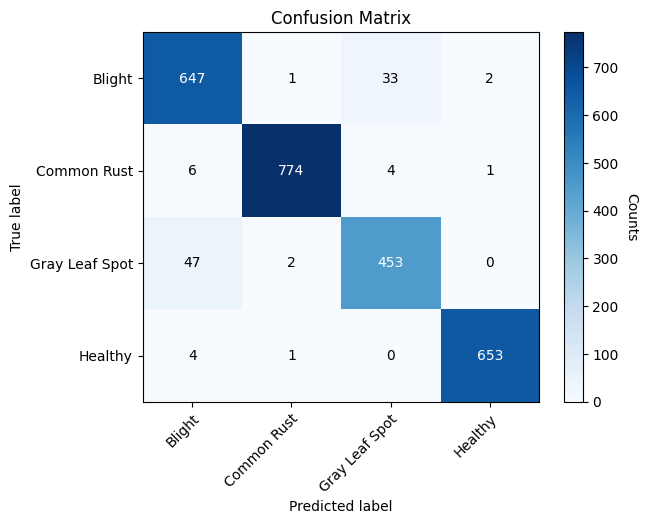

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Obtain predictions for the test set
test_pred = model.predict(X_test)
test_pred = np.argmax(test_pred, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, test_pred)

# Create figure and axis
fig, ax = plt.subplots()

# Plot the confusion matrix as an image
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Counts', rotation=-90, va="bottom")

# Set axis labels and title
class_names = ['Blight', 'Common Rust', 'Gray Leaf Spot', 'Healthy']  # Replace with your class names
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       xlabel='Predicted label', ylabel='True label',
       title='Confusion Matrix',
       aspect='auto')

# Rotate tick labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max() / 2. else "black")

# Show the plot
plt.show()
